# Module 1 Exercises 

The exercises in this notebook will ask you to plot simple graphs showing the linear relationships between different set of variables. The dataset used in the notebook is about Nutrition data of different food items. There are some of the variables in the dataset which have linear relationships between them.

Read the data from USDA dataset in `"/dsa/data/all_datasets/USDA.csv"` into the dataframe called _USDA_ . 

In [30]:

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

USDA = pandas.read_csv("/dsa/data/all_datasets/USDA.csv", sep=',', delimiter=None)

NameError: name 'matplotlib' is not defined

In [12]:
type(USDA)

pandas.core.frame.DataFrame

In [13]:
USDA.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [14]:
USDA = USDA.fillna(method='pad')

In [15]:
USDA.shape

(7058, 16)

In [16]:
USDA.describe

<bound method NDFrame.describe of          ID                 Description  Calories  Protein  TotalFat  \
0      1001            BUTTER,WITH SALT     717.0     0.85     81.11   
1      1002    BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11   
2      1003        BUTTER OIL,ANHYDROUS     876.0     0.28     99.48   
3      1004                 CHEESE,BLUE     353.0    21.40     28.74   
4      1005                CHEESE,BRICK     371.0    23.24     29.68   
...     ...                         ...       ...      ...       ...   
7053  80200               FROG LEGS,RAW      73.0    16.40      0.30   
7054  83110             MACKEREL,SALTED     305.0    18.50     25.10   
7055  90240  SCALLOP,(BAY&SEA),CKD,STMD     111.0    20.54      0.84   
7056  90560                   SNAIL,RAW      90.0    16.10      1.40   
7057  93600            TURTLE,GREEN,RAW      89.0    19.80      0.50   

      Carbohydrate  Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  \
0             0.06   7

In [17]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [18]:
USDA[["SaturatedFat","TotalFat"]].head()

,SaturatedFat,TotalFat
0,51.368,81.11
1,50.489,81.11
2,61.924,99.48
3,18.669,28.74
4,18.764,29.68


**Activity 1:** Fit a linear regression model to predict TotalFat using SaturatedFat.(Hint: use `linear_model.LinearRegression()`)

In [24]:
# Your code for activity 1 goes here..
sf = [["SaturatedFat"]]
tf = [["TotalFat"]]
# use linear_model

sftrain, sftest, tftrain, tftest = train_test_split(USDA[['SaturatedFat']],USDA[['TotalFat']], test_size = 0.4, random_state = 10)
regressor = linear_model.LinearRegression()
regressor.fit(sftrain,tftrain)
print(regressor.score(sftest,tftest))
totalfatprediction = regressor.predict(sftest)
print(totalfatprediction)
evaluate = pd.DataFrame({'Actual': tftest.values.flatten(), 'Predicted': totalfatprediction.flatten()})
evaluate.head(15)

0.5770205642464128
[[ 4.0745818 ]
 [ 4.12178363]
 [ 4.56736887]
 ...
 [19.14140478]
 [ 7.91303432]
 [10.98492918]]


,Actual,Predicted
0,0.00,4.074582
1,0.22,4.121784
2,1.41,4.567369
3,10.00,10.858428
4,21.39,18.146390
5,0.11,4.129336
6,0.24,4.121784
7,0.61,4.459749
8,0.50,4.269053
9,4.00,5.165888


**Activity 2:** Draw a scatter plot between TotalFat and SaturatedFat and fit a linear regression line predicting TotalFat using SaturatedFat.

[None, None, None, 110]

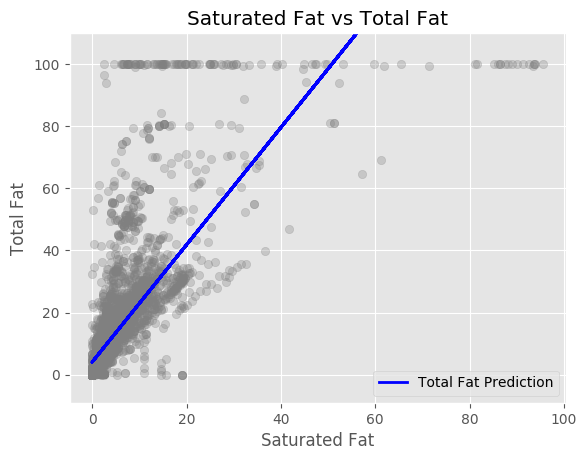

In [67]:
# Your code for activity 2 goes here..
plt.style.use('default')
plt.style.use('ggplot')


plt.scatter(USDA[["SaturatedFat"]], USDA[['TotalFat']], color = "grey", alpha = 0.3)
plt.plot(sftest, totalfatprediction, color = "blue", linewidth = 2, label = 'Total Fat Prediction')
plt.xlabel('Saturated Fat')
plt.ylabel('Total Fat')
plt.title('Saturated Fat vs Total Fat')
plt.legend()
plt.axis([None, None, None, 110])